**Task 1: Sentiment Analysis on Reviews**

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

import os

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Download The Dataset

In [2]:
import kagglehub

path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [3]:
csv_path = os.path.join(path, "IMDB Dataset.csv")

df = pd.read_csv(csv_path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.shape

(50000, 2)

In [5]:
df["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


# Preprocess The Data

In [6]:
# preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
  text = text.lower() # lowercasing
  text = re.sub(r'[^a-z\s]', '', text) # remove special characters, numbers, and punctuation
  tokens = text.split()
  tokens = [word for word in tokens if word not in stop_words] # removing stopwords
  return " ".join(tokens)

df["cleaned_review"] = df["review"].apply(preprocess_text)

In [7]:
df.head(1)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode yo...


# Split The Data

In [8]:
# split the data to train and test
X = df["cleaned_review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization TF-IDF

In [9]:
# vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression

In [10]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr)*100)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 89.64
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Naive Bayes

In [11]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb)*100)
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 86.94
              precision    recall  f1-score   support

    negative       0.86      0.89      0.87      4961
    positive       0.88      0.85      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Visualize Common Words

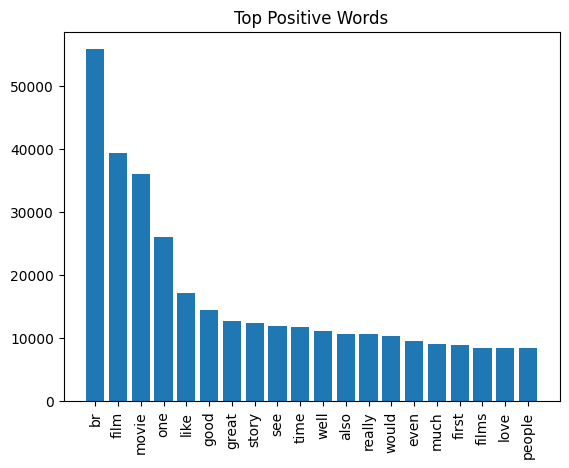

In [12]:
# visualization
from collections import Counter

# most common words in positive reviews
positive_words = " ".join(df[df['sentiment']=='positive']['cleaned_review']).split()
word_counts = Counter(positive_words).most_common(20)

words, counts = zip(*word_counts)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top Positive Words")
plt.show()

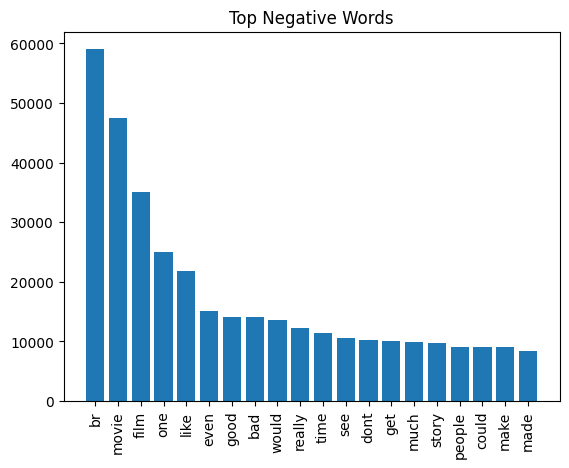

In [13]:
# visualization
from collections import Counter

# most common words in negative reviews
negative_words = " ".join(df[df['sentiment']=='negative']['cleaned_review']).split()
word_counts = Counter(negative_words).most_common(20)

words, counts = zip(*word_counts)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title("Top Negative Words")
plt.show()

# Inference

In [14]:
# sample review
sample_review = ["The movie was absolutely fantastic! The acting was great and the plot was engaging."]

# preprocess
sample_clean = [preprocess_text(sample_review[0])]

# convert to TF-IDF vector
sample_vec = vectorizer.transform(sample_clean)

# predict
pred = lr.predict(sample_vec)
pred_nb = nb.predict(sample_vec)

print("Review:", sample_review[0])
print("Predicted Sentiment:", pred[0])
print("Naive Bayes Prediction:", pred_nb[0])

Review: The movie was absolutely fantastic! The acting was great and the plot was engaging.
Predicted Sentiment: positive
Naive Bayes Prediction: positive


In [15]:
# sample review
sample_review = ["Worst film I've ever seen. Poor acting and predictable story."]

# preprocess
sample_clean = [preprocess_text(sample_review[0])]

# convert to TF-IDF vector
sample_vec = vectorizer.transform(sample_clean)

# predict
pred = lr.predict(sample_vec)
pred_nb = nb.predict(sample_vec)

print("Review:", sample_review[0])
print("Predicted Sentiment:", pred[0])
print("Naive Bayes Prediction:", pred_nb[0])

Review: Worst film I've ever seen. Poor acting and predictable story.
Predicted Sentiment: negative
Naive Bayes Prediction: negative


In [16]:
# sample review
sample_review = ["I couldn't stop laughing! The comedy was on point and the characters were so lovable."]

# preprocess
sample_clean = [preprocess_text(sample_review[0])]

# convert to TF-IDF vector
sample_vec = vectorizer.transform(sample_clean)

# predict
pred = lr.predict(sample_vec)
pred_nb = nb.predict(sample_vec)

print("Review:", sample_review[0])
print("Predicted Sentiment:", pred[0])
print("Naive Bayes Prediction:", pred_nb[0])

Review: I couldn't stop laughing! The comedy was on point and the characters were so lovable.
Predicted Sentiment: negative
Naive Bayes Prediction: positive


This is misclassification due to context loss

# Improved Preprocessing

In [17]:
lemmatizer = WordNetLemmatizer()

negation_words = {"not", "no", "never", "none", "nobody", "nothing", "neither",
                  "nor", "nowhere", "hardly", "scarcely", "barely",
                  "doesnt", "isnt", "wasnt", "shouldnt", "wouldnt", "couldnt",
                  "dont", "didnt", "cant", "wont", "aint"}

def improved_preprocess(text):
  text = text.lower() # lowercasing
  text = re.sub(r'[^a-z\s]', '', text)  # remove special characters, numbers, and punctuation
  tokens = word_tokenize(text) # tokenization

  processed_tokens = []
  negate = False
  negate_count = 0

  for word in tokens:
      if word in negation_words:
          negate = True
          negate_count = 2  # mark next 2 words
          continue  # skip the negation word itself
      if negate and negate_count > 0:
          processed_tokens.append("NEG_" + lemmatizer.lemmatize(word))
          negate_count -= 1
          if negate_count == 0:
              negate = False
      else:
          if word not in stop_words:
              processed_tokens.append(lemmatizer.lemmatize(word))

  return " ".join(processed_tokens)

df["improved_review"] = df["review"].apply(improved_preprocess)

In [18]:
# split the data to train and test
X = df["improved_review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# vectorization
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [20]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
y_pred_lr = lr.predict(X_test_vec)


print("\n--- Logistic Regression (Improved Preprocessing) ---")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr)*100)
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression (Improved Preprocessing) ---
Logistic Regression Accuracy: 89.61
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [21]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

print("\n--- Naive Bayes (Improved Preprocessing) ---")
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb)*100)
print(classification_report(y_test, y_pred_nb))


--- Naive Bayes (Improved Preprocessing) ---
Naive Bayes Accuracy: 89.25999999999999
              precision    recall  f1-score   support

    negative       0.88      0.90      0.89      4961
    positive       0.90      0.88      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



# Inference After Improvements

In [22]:
# sample review
sample_review = ["I couldn't stop laughing! The comedy was on point and the characters were so lovable."]

# preprocess
sample_clean = [improved_preprocess(sample_review[0])]

# convert to TF-IDF vector
sample_vec = vectorizer.transform(sample_clean)

# predict
pred = lr.predict(sample_vec)
pred_nb = nb.predict(sample_vec)

print("Review:", sample_review[0])
print("Prediction Sentiment:", pred[0])
print("Naive Bayes Prediction:", pred_nb[0])

Review: I couldn't stop laughing! The comedy was on point and the characters were so lovable.
Prediction Sentiment: positive
Naive Bayes Prediction: positive


In [23]:
# sample review
sample_review = ["The movie was never boring, always exciting."]

# preprocess
sample_clean = [improved_preprocess(sample_review[0])]

# convert to TF-IDF vector
sample_vec = vectorizer.transform(sample_clean)

# predict
pred = lr.predict(sample_vec)
pred_nb = nb.predict(sample_vec)

print("Review:", sample_review[0])
print("Prediction Sentiment:", pred[0])
print("Naive Bayes Prediction:", pred_nb[0])

Review: The movie was never boring, always exciting.
Prediction Sentiment: positive
Naive Bayes Prediction: positive


In [24]:
# sample review
sample_review = ["This is not good at all."]

# preprocess
sample_clean = [improved_preprocess(sample_review[0])]

# convert to TF-IDF vector
sample_vec = vectorizer.transform(sample_clean)

# predict
pred = lr.predict(sample_vec)
pred_nb = nb.predict(sample_vec)

print("Review:", sample_review[0])
print("Prediction Sentiment:", pred[0])
print("Naive Bayes Prediction:", pred_nb[0])

Review: This is not good at all.
Prediction Sentiment: negative
Naive Bayes Prediction: negative


# Saving The Models

In [25]:
import pickle

# save improved Logistic Regression model
with open("logistic_model.pkl", "wb") as f:
    pickle.dump(lr, f)

# save improved Naive Bayes model
with open("naive_bayes_model.pkl", "wb") as f:
    pickle.dump(nb, f)

# save vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)